In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import scale
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.decomposition import PCA

from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import linkage
from scipy.spatial.distance import pdist

In [2]:
# Loarding data set
X = pd.read_csv("hurricanes.csv")
X = X.query('Record == "Landfall"')
X = X.query('Wind >= 64')
X = X.query('Lat >= 24')
X = X.query('Lon <= -81')
#X.to_csv("hurricane_cluster.csv")
X = X.drop(X.columns[[0,1,2,3,4,5,6,7,8,9,13,14,15,16,17,18,19,20,21,22,23,24,25]], axis=1)
X = X.dropna()
X.shape

(208, 3)

In [3]:
# Scaling data
SX = pd.DataFrame(scale(X), index=X.index, columns=X.columns)
SX.head()

,Lat,Lon,Wind
4,0.122171,-1.476907,-0.522187
43,0.411084,-0.684419,0.466825
66,-0.166742,-1.496236,-1.016693
79,0.266628,-0.926031,1.950344
112,0.266628,-0.819721,0.961331


Text(0.5, 1.0, 'Elbow curve')

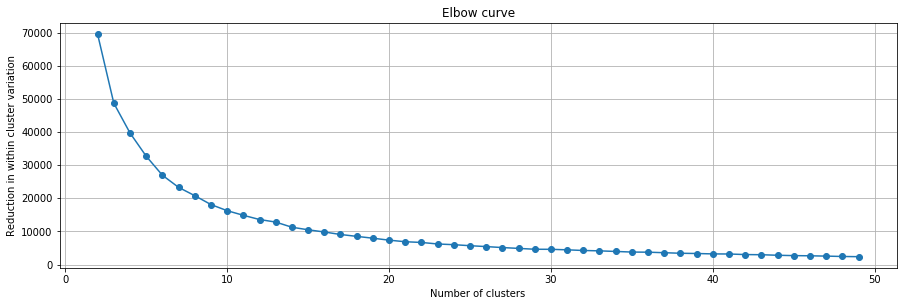

In [50]:
# See the within cluster variation for unscaled data
within_cluster_variance = []

for k in range(2, 50):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X)
    within_cluster_variance.append(kmeans.inertia_)

fig = plt.figure(figsize=(15, 4.5))
plt.plot(range(2, 50), within_cluster_variance, marker='o')
plt.grid(True)
plt.xlabel('Number of clusters')
plt.ylabel('Reduction in within cluster variation')
plt.title('Elbow curve') 

Text(0.5, 1.0, 'Elbow curve')

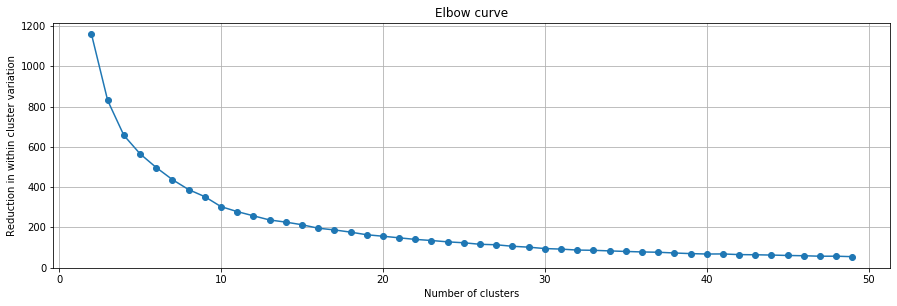

In [5]:
# See the within cluster variation for scaled data
within_cluster_variance = []

for k in range(2, 50):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(SX)
    within_cluster_variance.append(kmeans.inertia_)

fig = plt.figure(figsize=(15, 4.5))
plt.plot(range(2, 50), within_cluster_variance, marker='o')
plt.grid(True)
plt.xlabel('Number of clusters')
plt.ylabel('Reduction in within cluster variation')
plt.title('Elbow curve') 

In [67]:
# See the features associated with wine quality in 3 clusters for the unscaled data
X = pd.read_csv("hurricanes.csv")
X = X.query('Record == "Landfall"')
X = X.query('Wind >= 64')
X = X.query('Lat >= 24')
X = X.query('Lon <= -65')
X = X.drop(X.columns[[0,1,2,3,4,5,6,7,8,9,13,14,15,16,17,18,19,20,21,22,23,24,25]], axis=1)
X = X.dropna()

km1 = KMeans(n_clusters=15).fit(X)
X = pd.DataFrame(X, index=X.index, columns=X.columns)
X['cluster'] = km1.labels_

y = X.groupby('cluster').mean().sort_values(by=['Wind'])
# X.groupby('cluster').size()
y.to_csv("cluster.csv")

In [53]:
# See the features associated with wine quality in 3 clusters for the scaled data
X = pd.read_csv("hurricanes.csv")
X = X.query('Record == "Landfall"')
X = X.query('Wind >= 64')
X = X.query('Lat >= 24')
X = X.query('Lon <= -65')
X = X.drop(X.columns[[0,1,2,3,4,5,6,7,8,9,13,14,15,16,17,18,19,20,21,22,23,24,25]], axis=1)
X = X.dropna()
SX = pd.DataFrame(scale(X), index=X.index, columns=X.columns)

km2 = KMeans(n_clusters=15).fit(SX)
SX['cluster'] = km2.labels_

display((SX.groupby('cluster').mean().sort_values(by=['Wind'])))
SX.groupby('cluster').size()

,Lat,Lon,Wind
cluster,,,
4,-0.102356,-0.500385,-1.025770
6,-0.842502,0.462412,-0.994951
0,2.458960,1.644124,-0.934869
7,0.845465,0.775135,-0.862737
9,-0.486348,-1.591609,-0.820840
2,-0.018666,0.018794,-0.140537
13,-0.951584,0.508507,-0.027860
14,-0.218531,-1.183561,0.013761
5,2.470371,1.652838,0.258494


cluster
0     15
1     32
2     25
3     21
4     40
5     18
6     27
7     38
8      8
9     26
10    29
11    23
12    11
13    28
14    24
dtype: int64

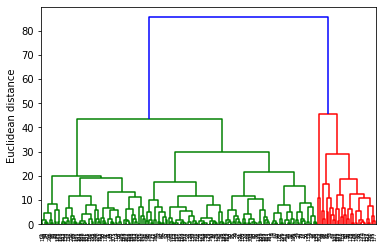

In [79]:
# See the dendrogram for the unscaled data
row_clusters = linkage(pdist(X, metric='euclidean'), method='complete')
row_dendr = dendrogram(row_clusters)

#plt.tight_layout()
plt.ylabel('Euclidean distance')
#plt.show()

plt.savefig('image/cluster.png')

In [3]:
# See the features associated with wine quality in 3 clusters for the unscaled data
X = pd.read_csv("hurricanes.csv")
X = X.query('Record == "Landfall"')
X = X.query('Wind >= 64')
X = X.query('Lat >= 24')
X = X.query('Lon <= -65')
X = X.drop(X.columns[[0,1,2,3,4,5,6,7,8,9,13,14,15,16,17,18,19,20,21,22,23,24,25]], axis=1)
X = X.dropna()

ac1 = AgglomerativeClustering(n_clusters=15, affinity='euclidean', linkage='complete').fit(X)
X['cluster'] = ac1.labels_

y = X.groupby('cluster').mean().sort_values(by=['Wind'])
y.to_csv("cluster.csv")
X.to_csv("clusterraw.csv")

In [4]:
X.groupby('cluster').size()

cluster
0     11
1     20
2     19
3     43
4     27
5     49
6     23
7     42
8      6
9     13
10    29
11     2
12    18
13    31
14    32
dtype: int64

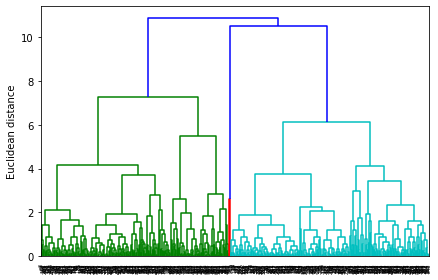

In [10]:
# See the dendrogram for the scaled data
row_clusters = linkage(pdist(SX, metric='euclidean'), method='complete')
row_dendr = dendrogram(row_clusters)

plt.tight_layout()
plt.ylabel('Euclidean distance')
plt.show()

In [12]:
# See the features associated with wine quality in 3 clusters for the scaled data
X = pd.read_csv("hurricanes.csv")
X = X.query('Record == "Landfall"')
X = X.query('Wind >= 64')
X = X.drop(X.columns[[0,1,2,3,4,5,6,7,8,9,13,14,15,16,17,18,19,20,21,22,23,24,25]], axis=1)
X = X.dropna()
SX = pd.DataFrame(scale(X), index=X.index, columns=X.columns)

ac2 = AgglomerativeClustering(n_clusters=10, affinity='euclidean', linkage='complete').fit(SX)
SX['cluster'] = ac2.labels_

display((SX.groupby('cluster').mean().sort_values(by=['Wind'])))
SX.groupby('cluster').size()

,Lat,Lon,Wind
cluster,,,
3,2.469588,6.162876,-1.140320
7,2.549039,1.808142,-0.859351
1,-0.231066,-0.573246,-0.825422
9,-1.624991,1.817159,-0.795467
4,1.346291,0.682644,-0.572993
0,0.199645,-0.351626,0.437390
8,-1.084354,-0.571386,0.477575
5,-1.164804,1.124892,0.863929
2,-1.021743,0.302266,2.112603


cluster
0    168
1    159
2     32
3      2
4     73
5     33
6      7
7     11
8     23
9     19
dtype: int64